Q5：

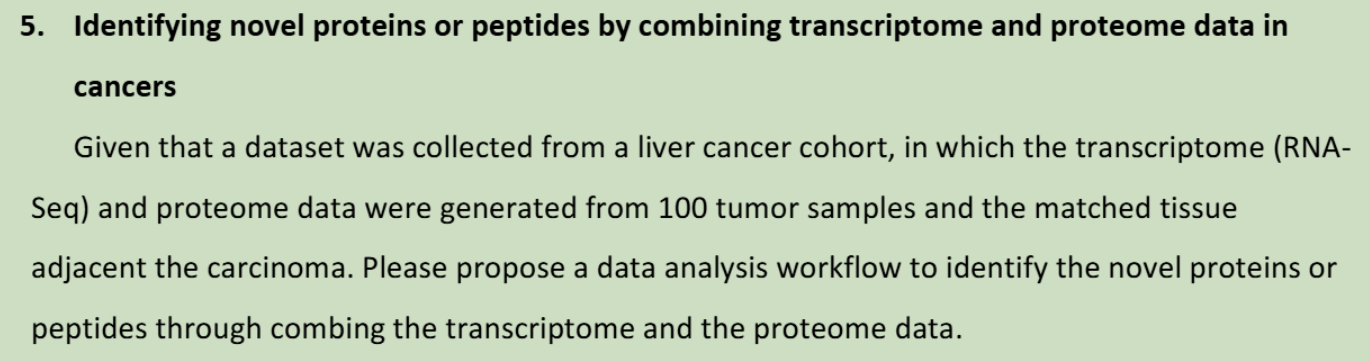



通过结合癌症转录组和蛋白质组数据识别新的蛋白质或肽

考虑到数据集来自一个肝癌队列，其中转录组（RNA- Seq）和蛋白质组数据来自100个肿瘤样本和匹配的癌旁组织。请提出一个数据分析流程，通过整合转录组和蛋白质组数据来鉴定新的蛋白质或肽。

In [1]:
import mermaid as md

In [2]:
%%mermaidjs
graph LR
T[Transcriptome] --> A[组装转录本]
P[Proteome] -->|质谱数据| D[数据库搜索]
A -->|预测ORF| N[Novel Peptides]
D -->|匹配失败| N
N --> V[功能验证]

转录本重构

工具：StringTie（组装RNA-Seq） → 输出新转录本

开放阅读框预测

工具：CPAT 或 TransDecoder

质谱数据分析

工具：MaxQuant + 自定义数据库（含新转录本翻译序列）

新肽段验证

要求：在≥5个样本中检测到且RNA表达支持（TPM>1）

排除假阳性：反向数据库搜索（如Percolator）

* 数据预处理 ：
  * 转录组数据处理 ：对 RNA-Seq 数据进行质量控制（如使用 FastQC），去除低质量读长和接头序列。然后将清洁读长比对到参考基因组（如使用 Hisat2），进行基因表达量计算（如使用 StringTie 或 featureCounts），得到每个基因和转录本在样本中的表达水平。
  * 蛋白质组数据处理 ：对蛋白质组数据（如质谱数据）进行预处理，包括数据库检索（使用 Mascot、MaxQuant 等软件将质谱数据与蛋白质数据库进行匹配），鉴定蛋白质和肽段，同时进行定量分析（如标签定量或非标签定量），得到蛋白质的表达谱。
* 转录本组装与新转录本预测 ：利用转录组数据，使用转录本组装工具（如 Trinity 或 StringTie）进行转录本组装，识别出与参考基因组注释不同的新转录本。这些新转录本可能是由于基因融合、可变剪接等事件产生的，有可能编码新的蛋白质或肽段。
* 蛋白质序列预测与数据库构建 ：将新预测的转录本序列翻译成蛋白质序列，构建包含新蛋白质序列和已知蛋白质序列的数据库。
* 整合分析与新蛋白质肽段鉴定 ：将蛋白质组数据与新构建的数据库进行比对，鉴定出在转录组数据中存在相应转录本支持但之前未被发现的蛋白质或肽段。通过比较肿瘤样本和癌旁组织中这些新蛋白质或肽段的表达差异，筛选出在癌症中具有潜在意义的新蛋白质或肽段。